In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("netflix.csv")

In [19]:
df.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


In [21]:
df.describe()

,imdb_score,runtime,year
count,583.000000,583.000000,583.000000
mean,6.275129,93.490566,2018.934820
std,0.976678,27.706665,1.474598
min,2.500000,4.000000,2014.000000
25%,5.700000,86.000000,2018.000000
50%,6.400000,97.000000,2019.000000
75%,7.000000,107.500000,2020.000000
max,9.000000,209.000000,2021.000000


In [6]:
df.isnull().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

In [44]:
df['premiere'] = pd.to_datetime(df['premiere'], errors = 'coerce')

In [45]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

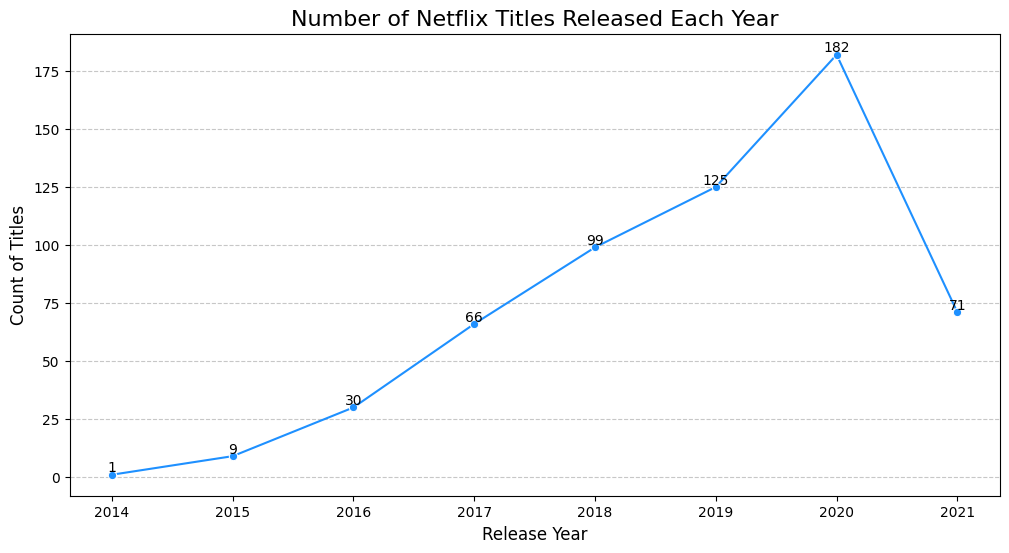

In [87]:
# 1. How many movies/TV shows are released each year?
df['release_year'] = df['premiere'].dt.year
yearly_releases = df.groupby('release_year').size().reset_index(name='count')
# print(yearly_releases)

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_releases, x='release_year', y='count', marker='o', color='dodgerblue')

for x, y in zip(yearly_releases['release_year'], yearly_releases['count']):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom', color='black')

plt.title('Number of Netflix Titles Released Each Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count of Titles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


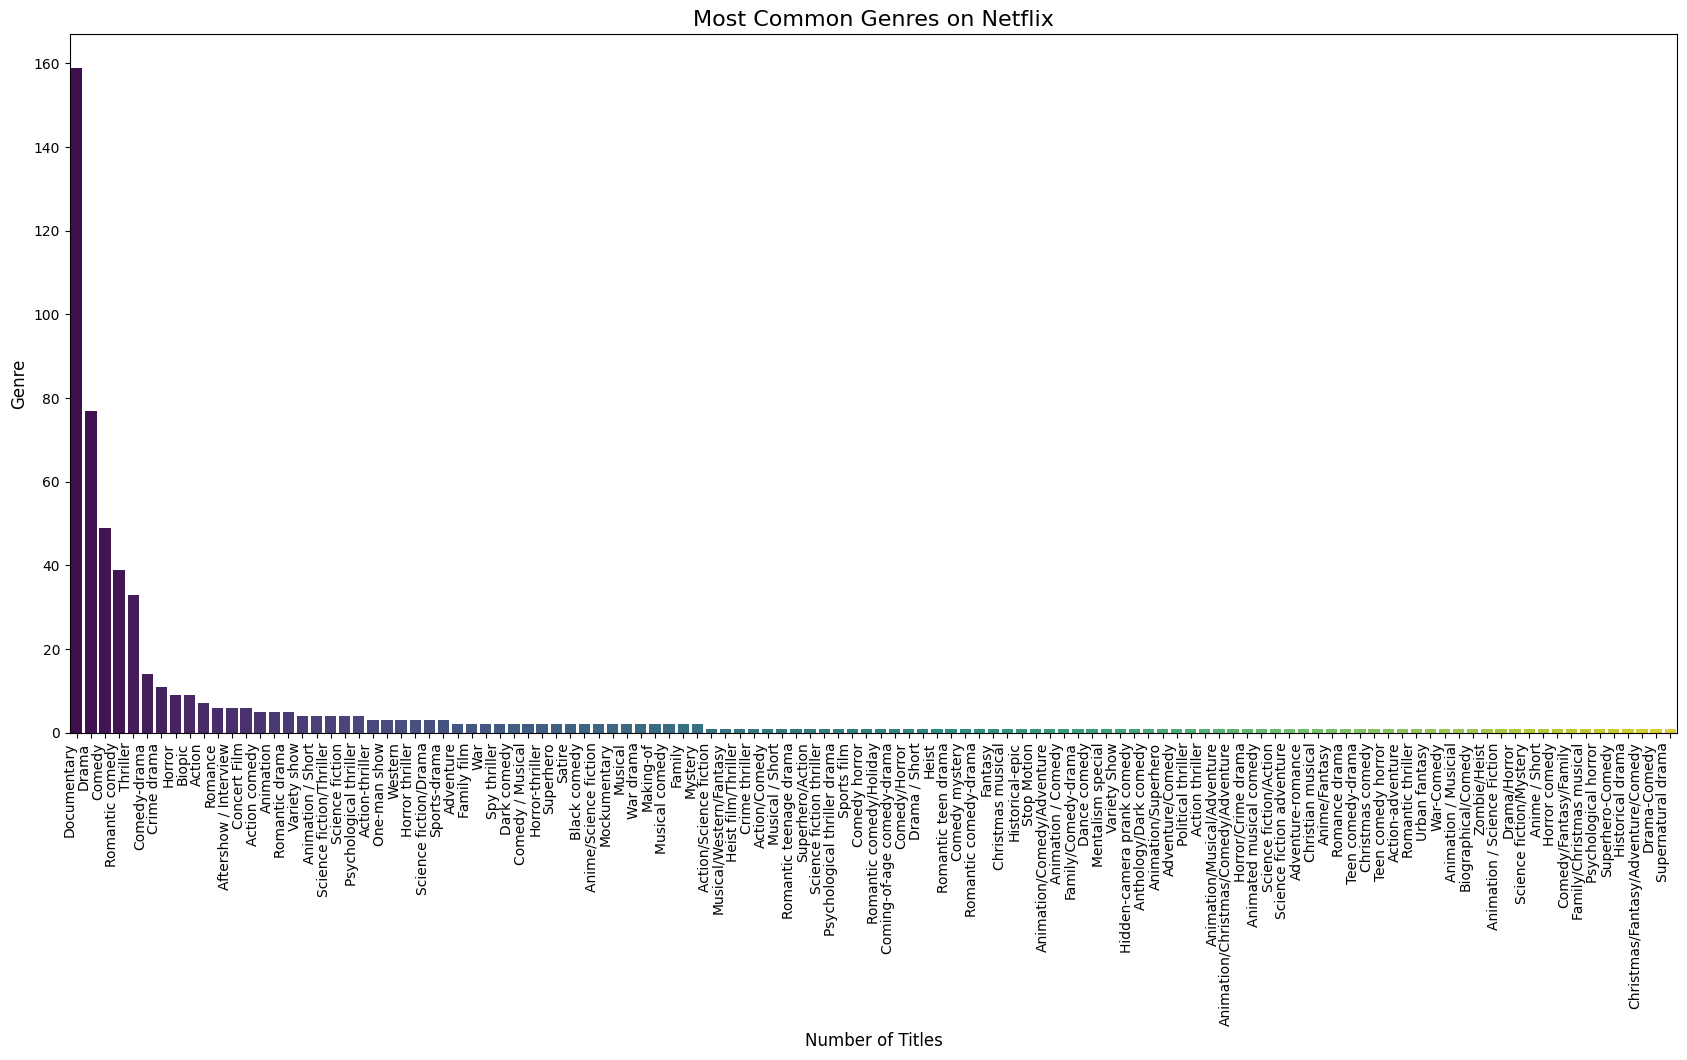

In [108]:
# 2: Which genres are most common on Netflix?
genre_counts = df['genre'].value_counts()

plt.figure(figsize=(18, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', legend = False)
plt.title('Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.xticks(rotation=90, ha='right', fontsize = 10)
plt.show()

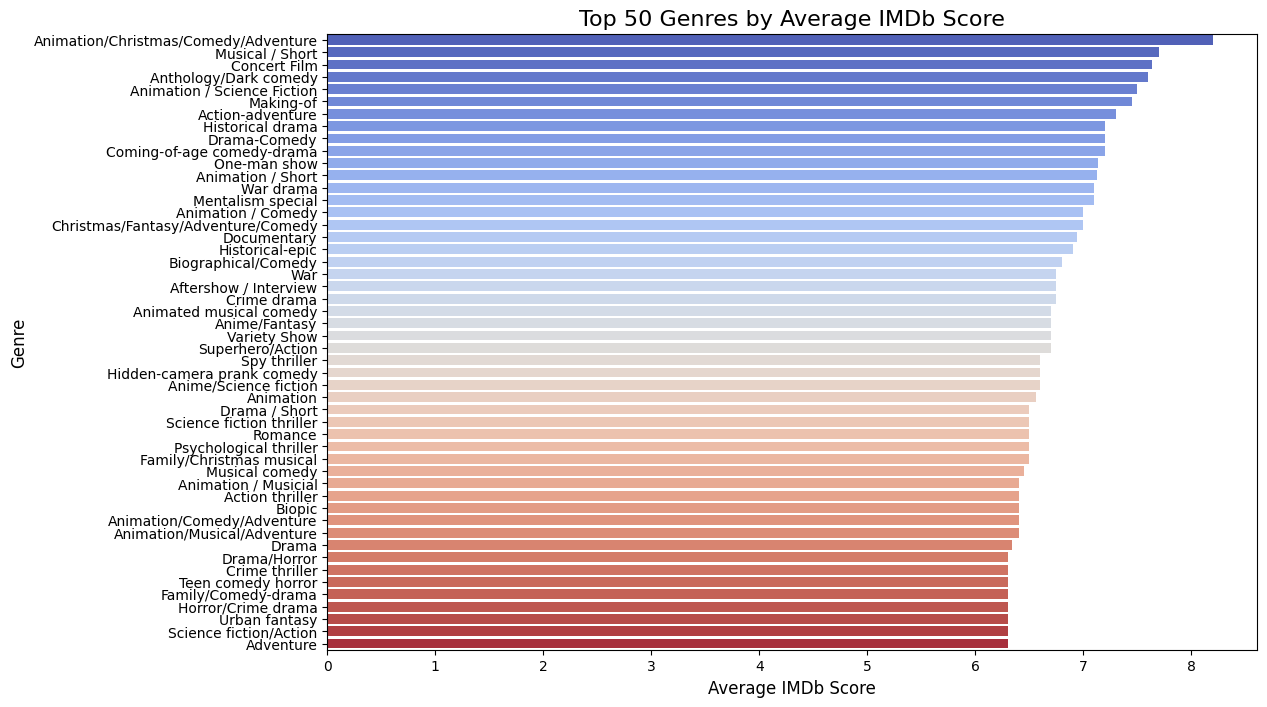

In [105]:
# 3: Which genres have the highest average IMDb scores?
genre_avg_imdb = df.groupby('genre')['imdb_score'].mean().sort_values(ascending=False)
# print(genre_avg_imdb)

top_genres = genre_avg_imdb.head(50)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index,hue = top_genres.index, palette='coolwarm', legend = False)

plt.title('Top 50 Genres by Average IMDb Score', fontsize=16)
plt.xlabel('Average IMDb Score', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

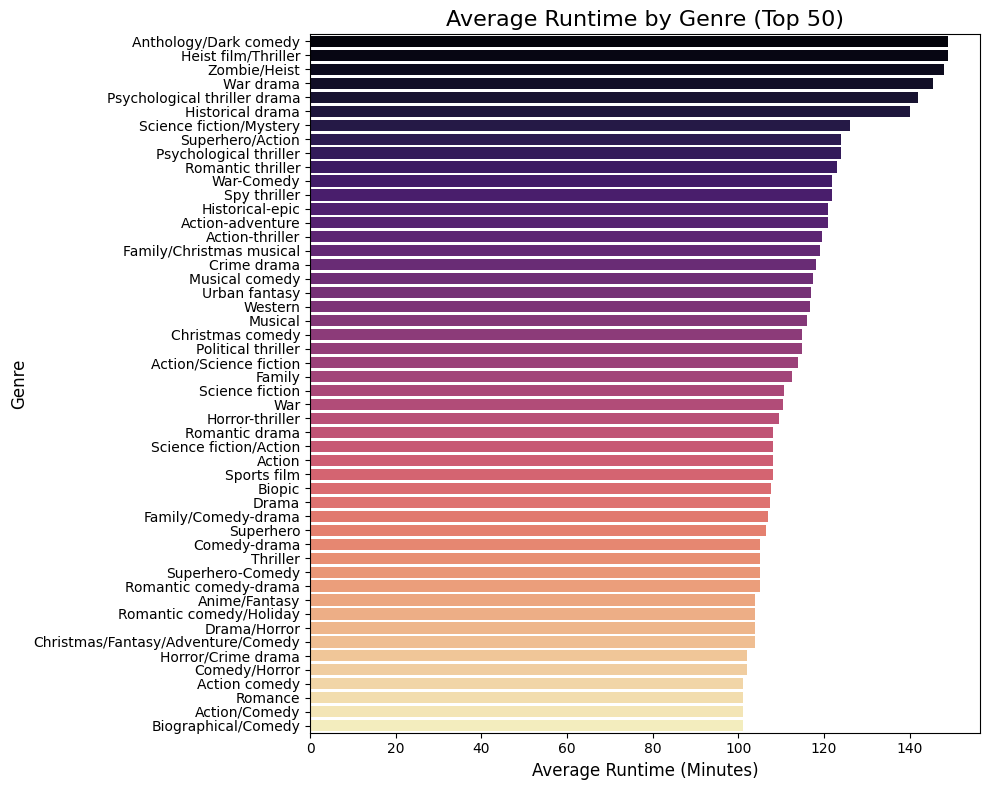

In [106]:
# 4: What is the average runtime for each genre?
genre_avg_runtime = df.groupby('genre')['runtime'].mean().sort_values(ascending=False)
# print(genre_avg_runtime)

top_genres_avg_runtime = genre_avg_runtime.head(50)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_genres_avg_runtime.values, y=top_genres_avg_runtime.index, hue = top_genres_avg_runtime.index ,palette='magma', legend = False)

plt.title('Average Runtime by Genre (Top 50)', fontsize=16)
plt.xlabel('Average Runtime (Minutes)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

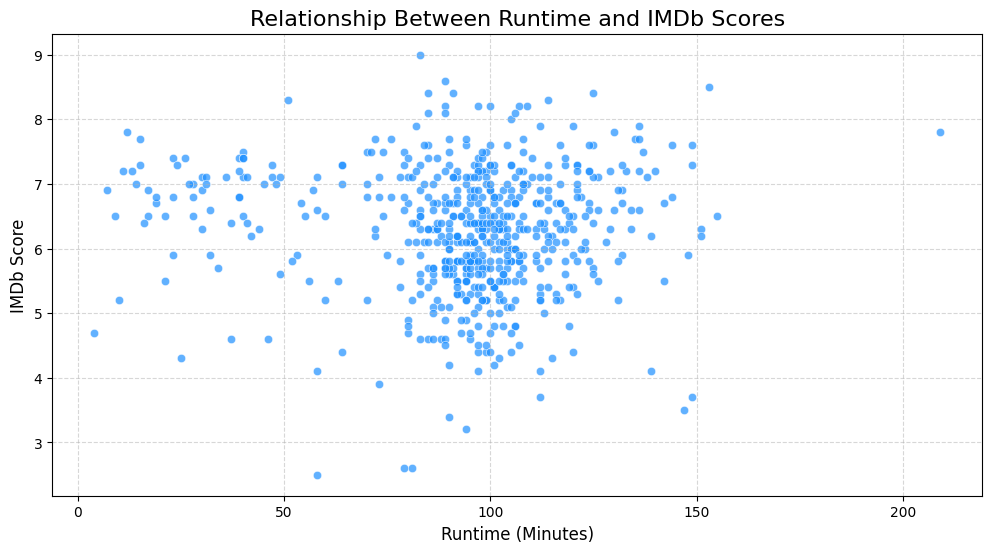

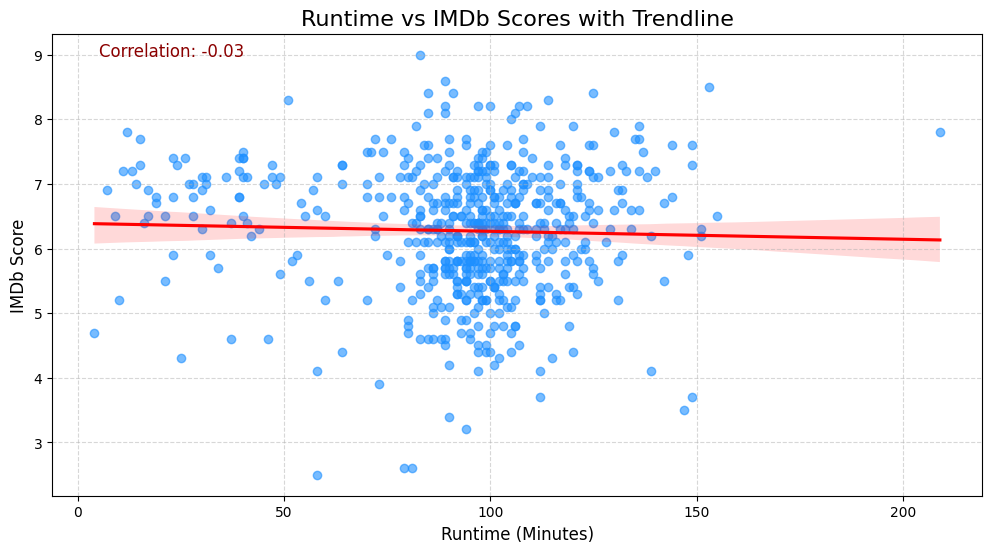

Correlation Coefficient between Runtime and IMDb Score: -0.03


In [32]:
# 5: How do IMDb scores vary with runtime?

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='runtime', y='imdb_score', color='dodgerblue', alpha=0.7)

plt.title('Relationship Between Runtime and IMDb Scores', fontsize=16)
plt.xlabel('Runtime (Minutes)', fontsize=12)
plt.ylabel('IMDb Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='runtime', y='imdb_score', scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, color='dodgerblue')

plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", fontsize=12, transform=plt.gca().transAxes, color='darkred')

plt.title('Runtime vs IMDb Scores with Trendline', fontsize=16)
plt.xlabel('Runtime (Minutes)', fontsize=12)
plt.ylabel('IMDb Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

correlation = df['runtime'].corr(df['imdb_score'])
print(f"Correlation Coefficient between Runtime and IMDb Score: {correlation:.2f}")

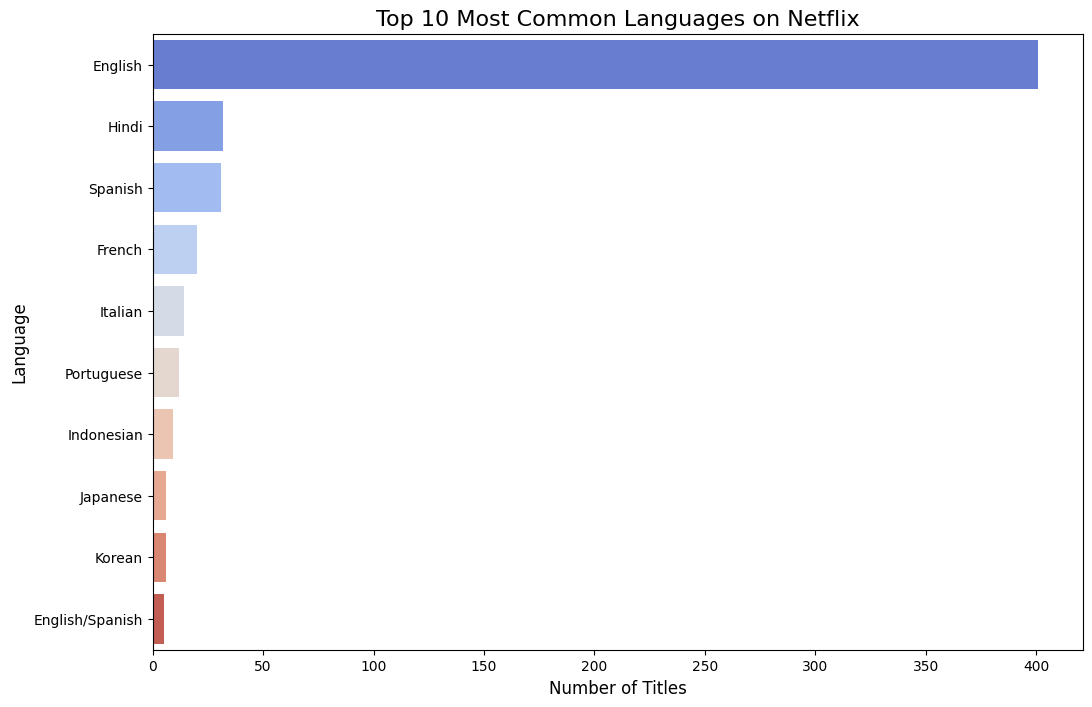

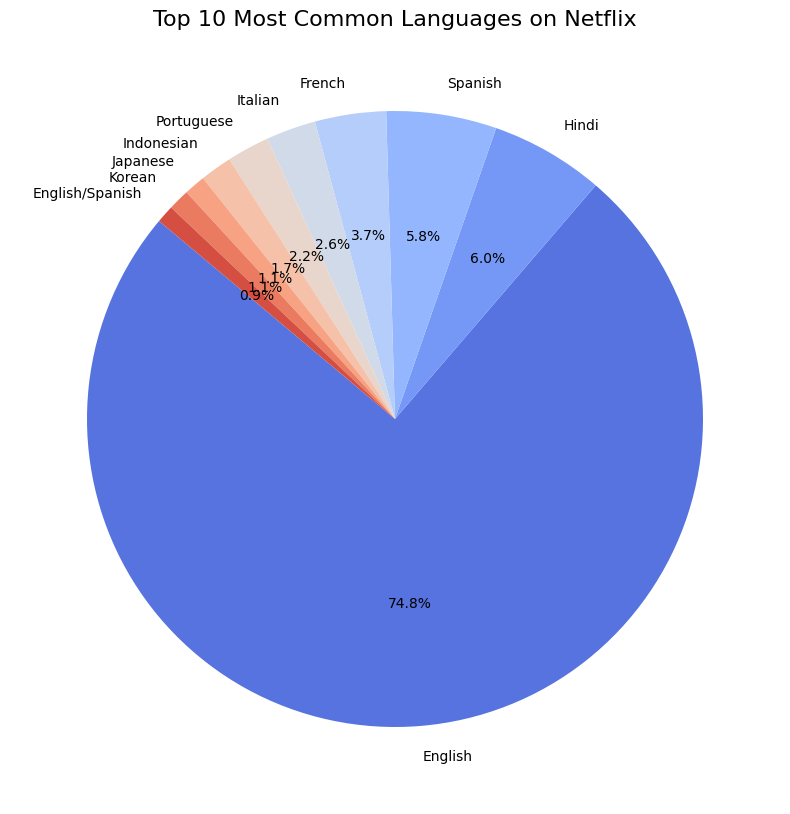

In [107]:
# 6: Which languages dominate Netflix’s content?

language_counts = df['language'].value_counts()
# print(language_counts)

plt.figure(figsize=(12, 8))
sns.barplot(x=language_counts.values[:10], y=language_counts.index[:10], hue = language_counts.index[:10], palette='coolwarm', legend = False)

plt.title('Top 10 Most Common Languages on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.show()

plt.figure(figsize=(10, 10))
language_counts[:10].plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', 10), startangle=140)

plt.title('Top 10 Most Common Languages on Netflix', fontsize=16)
plt.ylabel('')  # Remove default ylabel
plt.show()

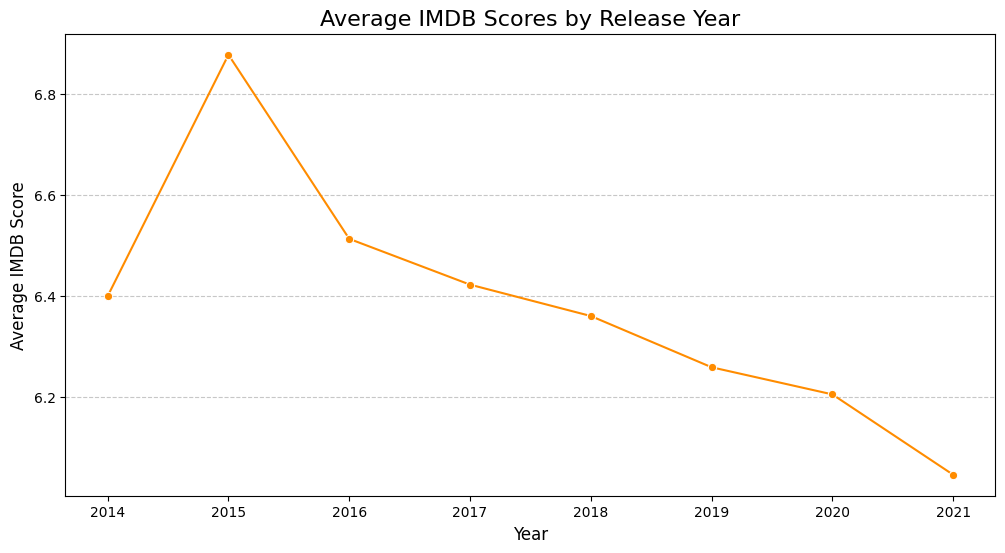

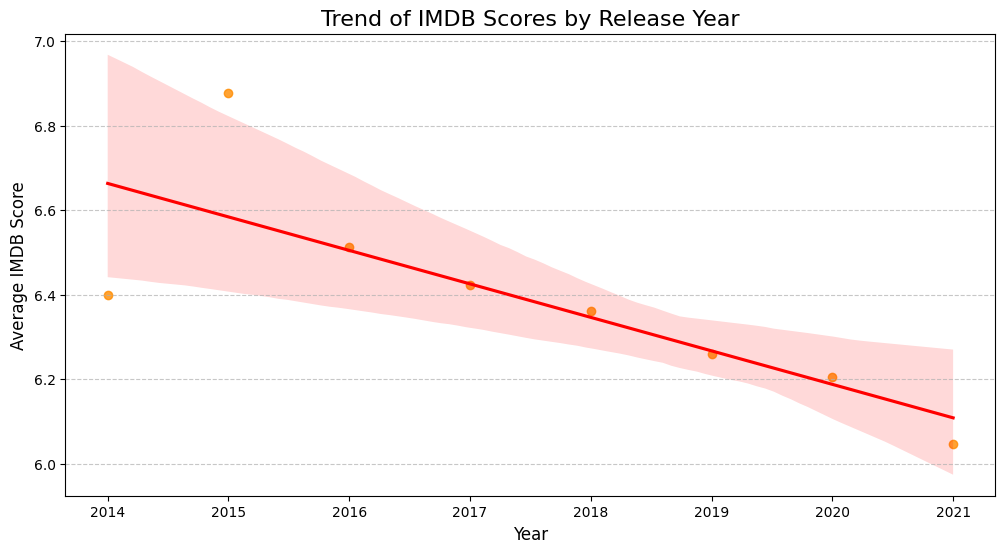

In [60]:
#  7: Are newer releases getting better IMDB scores on average?

yearly_avg_imdb = df.groupby('year')['imdb_score'].mean().reset_index()
# print(yearly_avg_imdb)

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_imdb, x='year', y='imdb_score', marker='o', color='darkorange')

plt.title('Average IMDB Scores by Release Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average IMDB Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(data=yearly_avg_imdb, x='year', y='imdb_score', scatter_kws={'color': 'darkorange'}, line_kws={'color': 'red'})

plt.title('Trend of IMDB Scores by Release Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average IMDB Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()